In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import scipy.fft
from scipy import stats
from scipy.stats import norm
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [109]:
d = pd.read_pickle('Data/data_60/X.pkl'); X_60 = pd.DataFrame(d)
d = pd.read_pickle('Data/data_60/y_car.pkl'); y_car_60 = pd.DataFrame(d)
d = pd.read_pickle('Data/data_60/y_camion.pkl'); y_camion_60 = pd.DataFrame(d)
X_car_60_50 = SelectKBest(f_regression, k=50).fit_transform(X_60, y_car_60.values.ravel())
X_camion_60_50 = SelectKBest(f_regression, k=50).fit_transform(X_60, y_camion_60.values.ravel())

In [110]:
X_train_car_60_50, X_test_car_60_50, y_train_car_60_50, y_test_car_60_50 = train_test_split(X_car_60_50, y_car_60.values.ravel())
X_train_camion_60_50, X_test_camion_60_50, y_train_camion_60_50, y_test_camion_60_50 = train_test_split(X_camion_60_50, y_camion_60.values.ravel())

In [111]:
def graf_car(y_p_car, y_car_pip, s):
    car = pd.DataFrame(data=y_p_car, columns=['y_predicted'])
    df_car = pd.DataFrame(data=y_car_pip, columns=['y_true'])
    df_car = pd.concat([car,df_car], axis=1)

    
    title = "CAR "+s+" label/prediction"
    plt.title(title)
    sns.scatterplot(data=df_car,x='y_predicted', y='y_true')
    plt.show()

MSE_car_pip_svr_60_05: 0.6192304292986595
MAE_car_pip_svr_60_05: 0.566989604230993
R2_car_score_svr_60_05: 0.9442406781092116
MSPE_car_pip_svr_60_05: 9.633625347676924
MAPE_car_pip_svr_60_05: 8.820893103356454


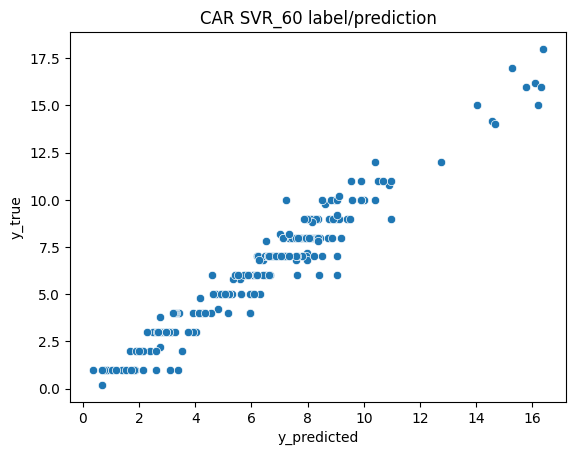

In [121]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_50,y_train_car_60_50)
y_p_car_svr_60_50 = pipeline_svr_car.predict(X_test_car_60_50)
y_test_car_60_50

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_test_car_60_50, y_p_car_svr_60_50)
print("MSE_car_pip_svr_60_05:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_test_car_60_50, y_p_car_svr_60_50)
print("MAE_car_pip_svr_60_05:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_test_car_60_50, y_p_car_svr_60_50)
print("R2_car_score_svr_60_05:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_test_car_60_50))*100
print("MSPE_car_pip_svr_60_05:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_test_car_60_50))*100
print("MAPE_car_pip_svr_60_05:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_50, y_test_car_60_50, "SVR_60")

MSE_car_pip_svr_60_05: 0.0982915088989817
MAE_car_pip_svr_60_05: 0.20807175514464724
R2_car_score_svr_60_05: 0.9769564952856513
MSPE_car_pip_svr_60_05: 3.2092249611234136
MAPE_car_pip_svr_60_05: 6.793558037665641


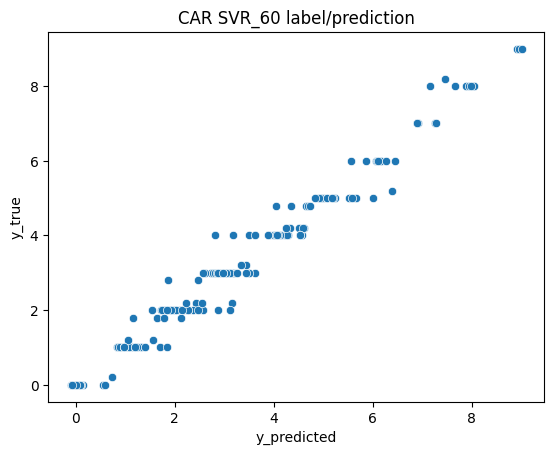

In [122]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_camion_60_50,y_train_camion_60_50)
y_p_camion_svr_60_50 = pipeline_svr_car.predict(X_test_camion_60_50)
y_test_camion_60_50

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_test_camion_60_50, y_p_camion_svr_60_50)
print("MSE_car_pip_svr_60_05:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_test_camion_60_50, y_p_camion_svr_60_50)
print("MAE_car_pip_svr_60_05:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_test_camion_60_50, y_p_camion_svr_60_50)
print("R2_car_score_svr_60_05:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_test_camion_60_50))*100
print("MSPE_car_pip_svr_60_05:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_test_camion_60_50))*100
print("MAPE_car_pip_svr_60_05:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_camion_svr_60_50, y_test_camion_60_50, "SVR_60")